<a href="https://colab.research.google.com/github/OwaisAbuSalah/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction of Product Sales**




#Project 1 - Parts 1 & 2


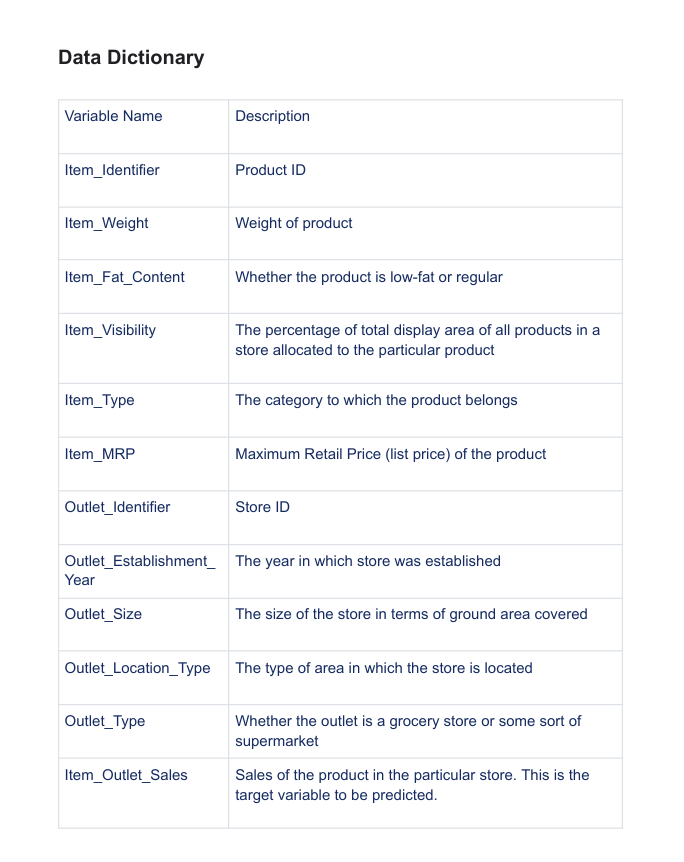.describe()*italicized text*

#Loading Data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
fpath = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Data Cleaning

In [4]:
# 1) How many rows and columns?
df.shape

(8523, 12)

In [5]:
# 2) What are the datatypes of each variable?
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [6]:
# 3) Are there duplicates? If so, drop any duplicates.
duplicates = df.duplicated().sum()
duplicates


np.int64(0)

In [7]:
df_cleaned = df.drop_duplicates()
df_cleaned

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
# 4) Identify missing values.

missing_values = df.isnull().sum()
missing_values

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [9]:
# 5) Address the missing values by using a placeholder value.

#df['Item_Weight'].fillna(0, inplace = True)
#df['Outlet_Size'].fillna('MISSING' , inplace = True);

In [10]:
# 6) Confirm that there are no missing values after addressing them.


missing_values = df.isnull().sum()
missing_values

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [11]:
# 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
for col in ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
  print(col)
  print(df[col].unique())



Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Size
['Medium' nan 'High' 'Small']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [51]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat",'reg':'Regular','low fat':"Low Fat"})


In [13]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
summary_stats = df[numerical_columns].describe()
summary_stats_custom = df[numerical_columns].agg(['min', 'max', 'mean'])
summary_stats_custom

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914


# Project 1 - Part 3

For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:



*  Histograms to view the distributions of numerical features in your dataset.
*  Boxplots to view statistical summaries of numerical features in your dataset.
* Countplots to view the frequency of each class of categorial features in your dataset.

* Heatmap to view the correlation between features.





Start updating the README file associated with the project.

Add text describing the project.
Select two key visuals of different types that demonstrate a relevant insight into the data. Add text with a brief (1 sentence is sufficient) interpretation of the visuals you include.

# Exploratory Visuals & Analysis


In [14]:
# Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

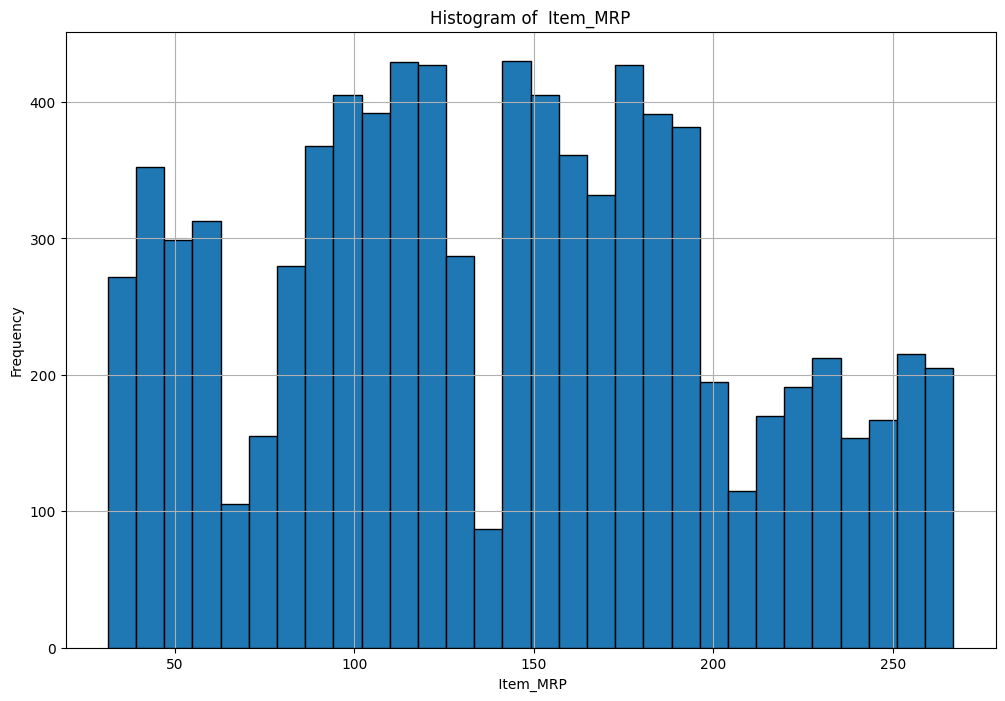

In [16]:
plt.figure(figsize=(12, 8))
# Create the histogram
ax = df["Item_MRP"].hist(bins=30, edgecolor='black')
plt.title(f'Histogram of {" Item_MRP"}')
plt.xlabel(" Item_MRP")
plt.ylabel('Frequency')
plt.show()


* Most items have an MRP within the range of 100-200, which could indicate this price range is popular or competitive in the market.

* Fewer items are priced very low (below 50) or very high (above 200), suggesting these price points might be less common or targeted towards niche markets.







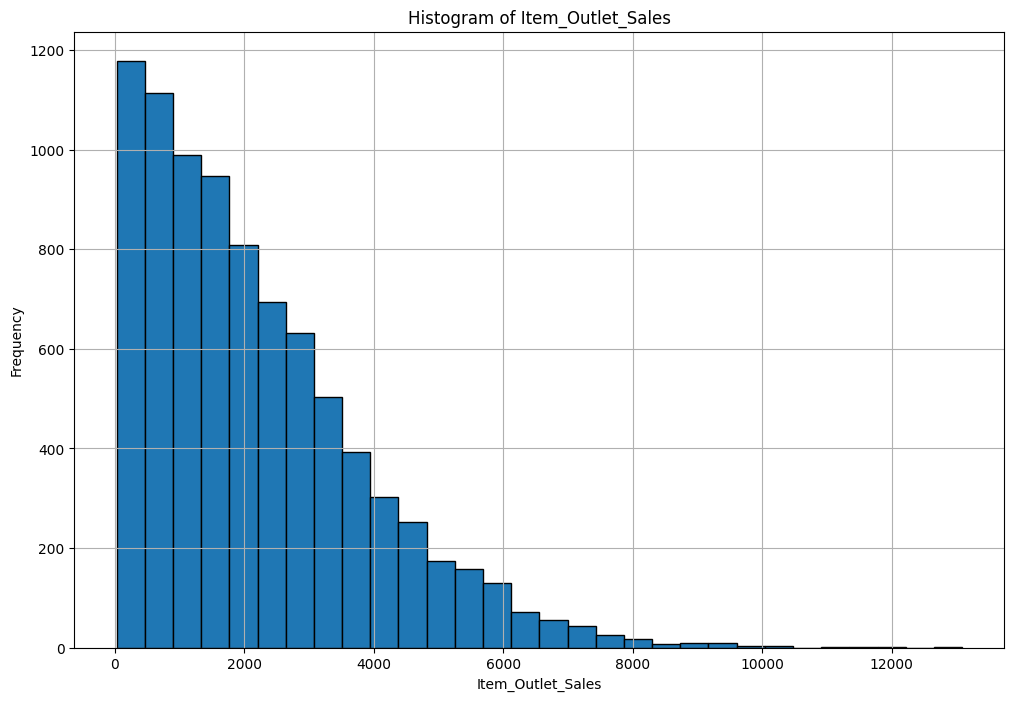

In [17]:
plt.figure(figsize=(12, 8))
# Create the histogram
ax = df["Item_Outlet_Sales"].hist(bins=30, edgecolor='black')
plt.title(f'Histogram of {"Item_Outlet_Sales"}')
plt.xlabel("Item_Outlet_Sales")
plt.ylabel('Frequency')
plt.show()



*  The majority of sales values fall between 0 and 3000, indicating that most products have relatively low sales.

*   There are fewer occurrences of very high sales, suggesting that only a few products achieve significantly high sales.



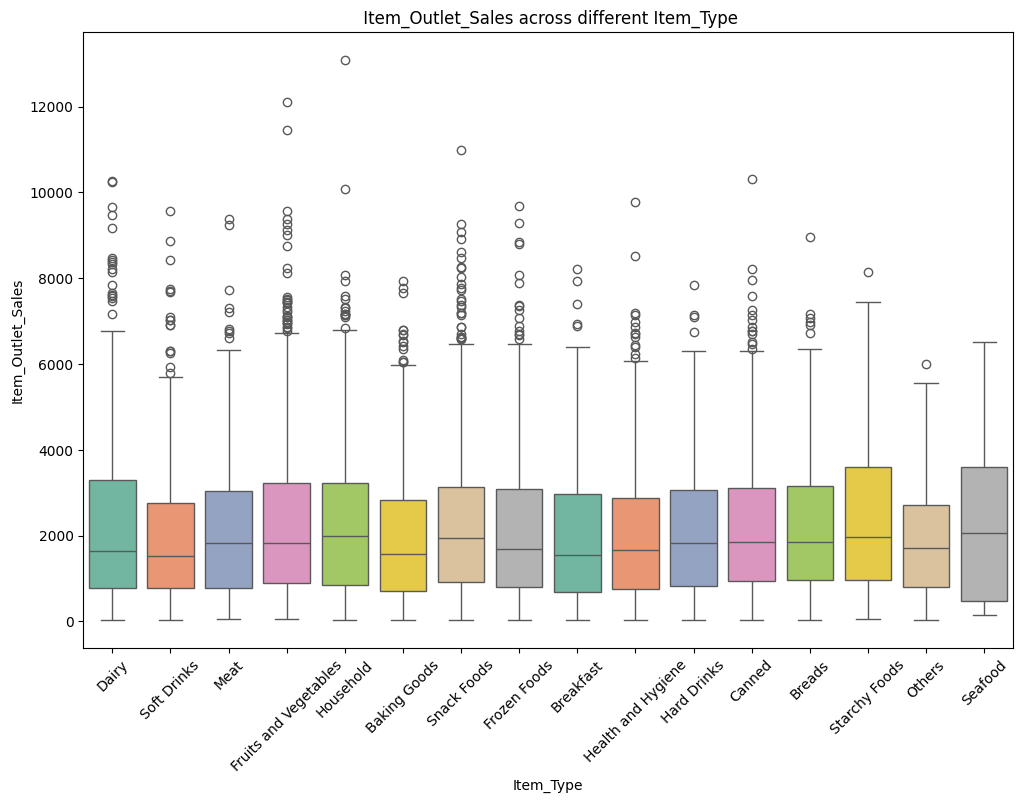

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Item_Type", y="Item_Outlet_Sales", palette="Set2")
plt.title(" Item_Outlet_Sales across different Item_Type")
plt.xticks(rotation=45)
plt.show();

* The median sales for each category are relatively similar, but there is
variability in the interquartile ranges.

* Some categories, such as Starchy Foods, Breads, and Seafood, show a wider spread, indicating greater variability in sales.

* Many categories have numerous outliers (small circles above the whiskers), indicating that certain products achieve significantly higher sales than others in the same category.

* This visualization helps identify which product types have more consistent sales and which have a higher chance of extreme sales fluctuations.

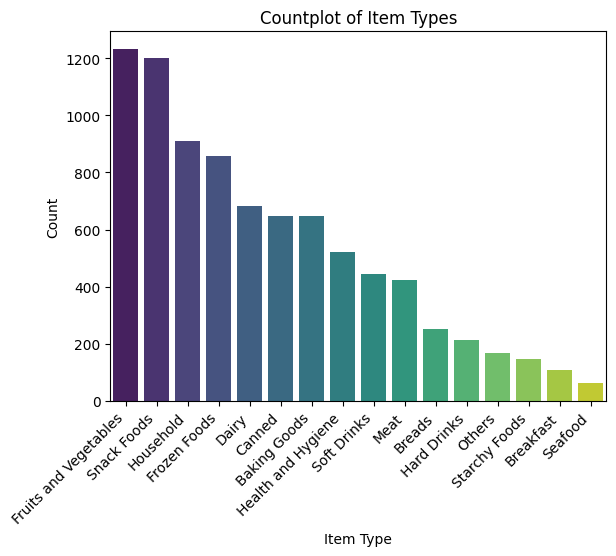

In [19]:
sns.countplot(x=df['Item_Type'], order=df['Item_Type'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Countplot of Item Types')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.show()



*   The store or dataset appears to have a strong focus on fresh produce ("Fruits and Vegetables") and convenience items like "Snack Foods."

*   Categories like "Seafood" and "Breakfast" items are less represented, suggesting they might be niche or less frequently purchased items in this context.

*   Household items are also a significant category, indicating a broad range of non-food essentials.







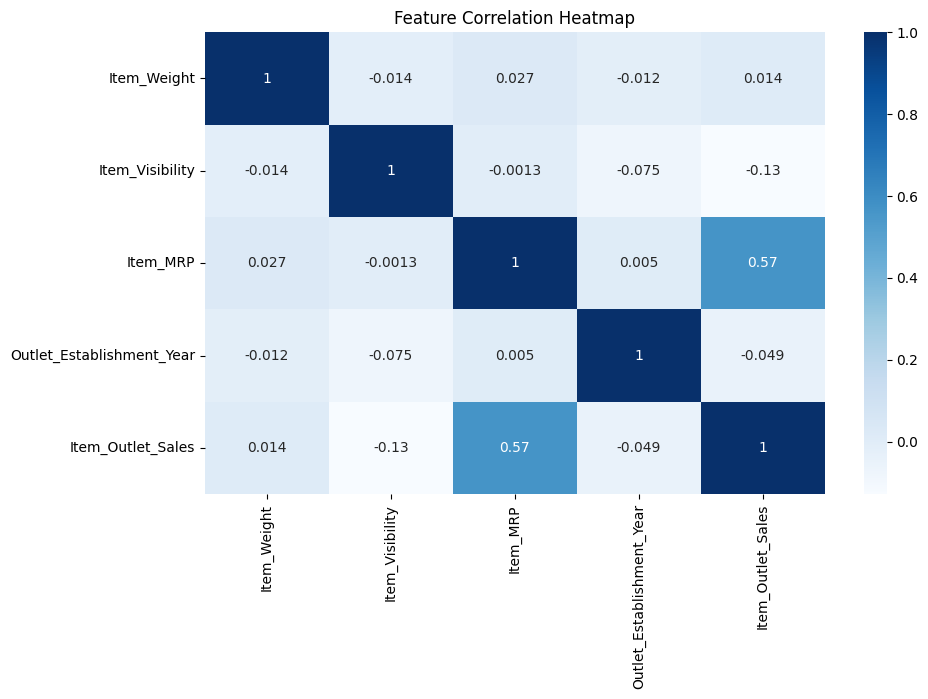

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='Blues')
plt.title('Feature Correlation Heatmap')
plt.show()





*  The most significant factor influencing Item_Outlet_Sales appears to be Item_MRP, indicating that pricing strategy plays a crucial role in sales performance.

*   Factors like Item_Weight, Item_Visibility, and Outlet_Establishment_Year have minimal impact on sales, based on this dataset.








#Project_Part 4


#Functions

In [21]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  plt.xticks(rotation = 90)
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  plt.xticks(rotation = 90)
  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [22]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

#Item_Fat_Content

###Item_Fat_Content : Whether the product is low-fat or regular


In [52]:
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

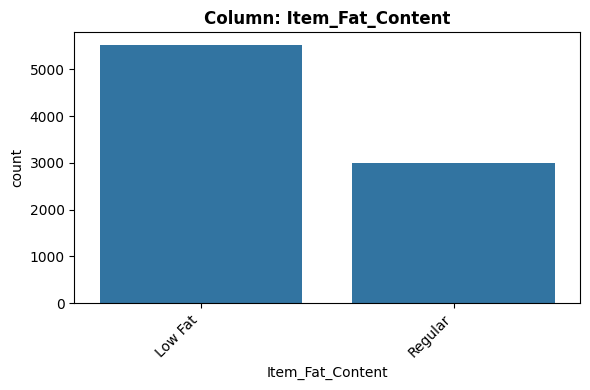

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [53]:
# Calling our custom EDA function
explore_categorical(df, feature);

# 2) Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)

`Categorical.`

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

`0 null values.`

`No need to impute.`

Is the feature constant or quasi-constant?

`Not constant or quasi-constant.`


What is the cardinality? Is it high?

`Low (4)`

Would we know this BEFORE the target is determined?

`Yes.`

Is there a business case/understanding reason to exclude based on our business case?

`No`



(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

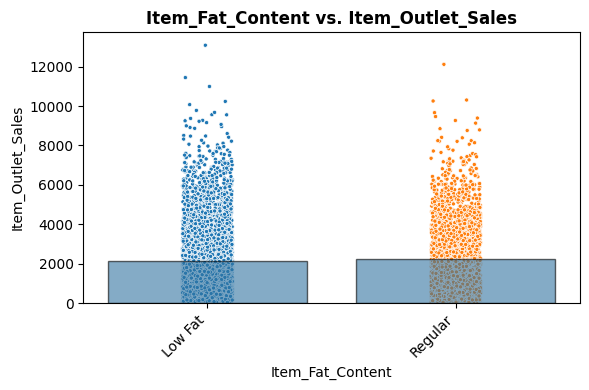

In [54]:
plot_categorical_vs_target(df, x=feature, y='Item_Outlet_Sales') # Changed the y value to 'Item_Outlet_Sales'


Feature vs. Target Observations:

  Based on your business understanding, would you expect this feature to be a predictor of the target?

`Yes. Low fat has achieved more sales and this indicates the amount of sales related to the fat content.`

Does this feature appear to be a predictor of the target?

`Yes it does`

#Inspecting: Item_Visibility

###Item_Visibility : The percentage of total display area of all products in a store allocated to the particular product


In [26]:
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

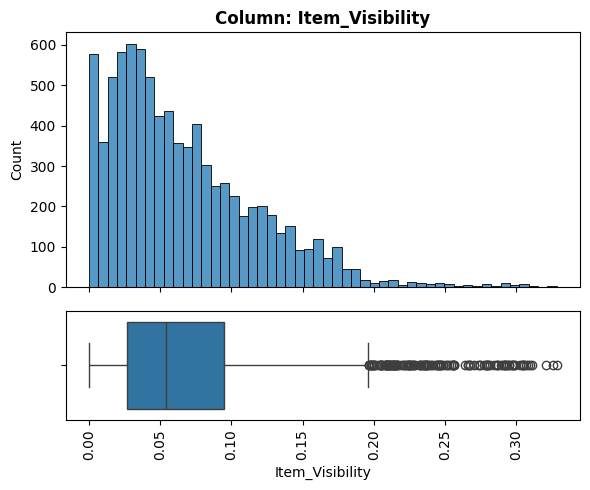

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [27]:
explore_numeric(df, feature);

2) Feature Observations
What type of feature is it? (Categorical (nominal), ordinal, numeric)

`numeric.`

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

`0 null values.`

`No need to impute.`

Is the feature constant or quasi-constant?

`Not constant or quasi-constant.`

What is the cardinality? Is it high?

`Not applicable, numeric.`


Would we know this BEFORE the target is determined?

`Yes.`

Is there a business case/understanding reason to exclude based on our business case?

`No`

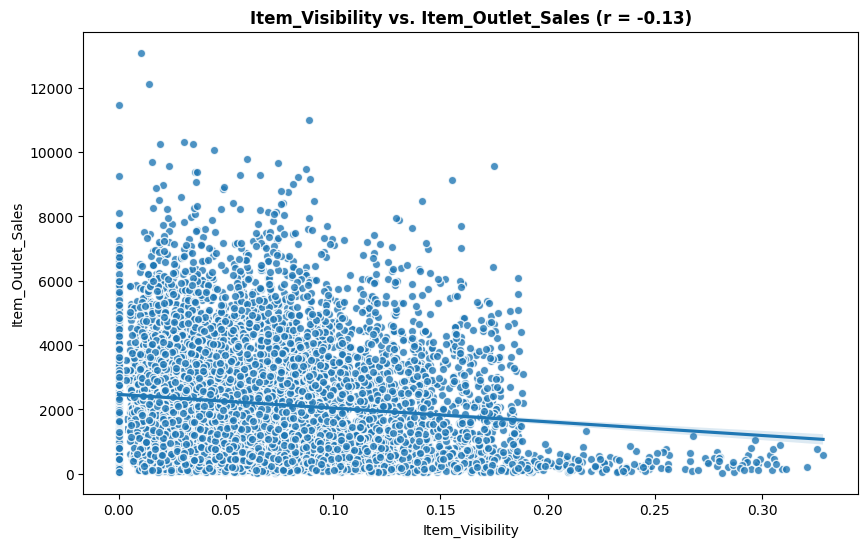

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [28]:
plot_numeric_vs_target(df, x =feature, y='Item_Outlet_Sales', figsize=(10, 6))

4) Feature vs. Target Observations

Based on your business understanding, would you expect this feature to be a predictor of the target?

Does this feature appear to be a predictor of the target?


#Inspecting: Item_Type

###Item_Type : The category to which the product belongs


In [29]:
feature = "Item_Type"
df[feature].dtype

dtype('O')

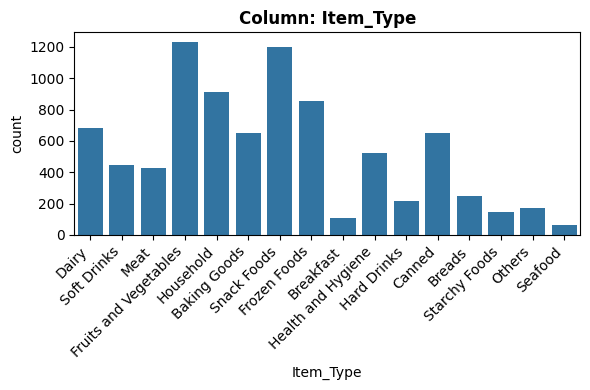

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [30]:
explore_categorical(df, feature);

2) Feature Observations What type of feature is it? (Categorical (nominal), ordinal, numeric)

`Categorical.`

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

`0 null values.`

`No need to impute.`

Is the feature constant or quasi-constant?

`Not constant or quasi-constant.`

What is the cardinality? Is it high?

`16 ,it's high`

Would we know this BEFORE the target is determined?

`Yes.`

Is there a business case/understanding reason to exclude based on our business case?

`No`

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

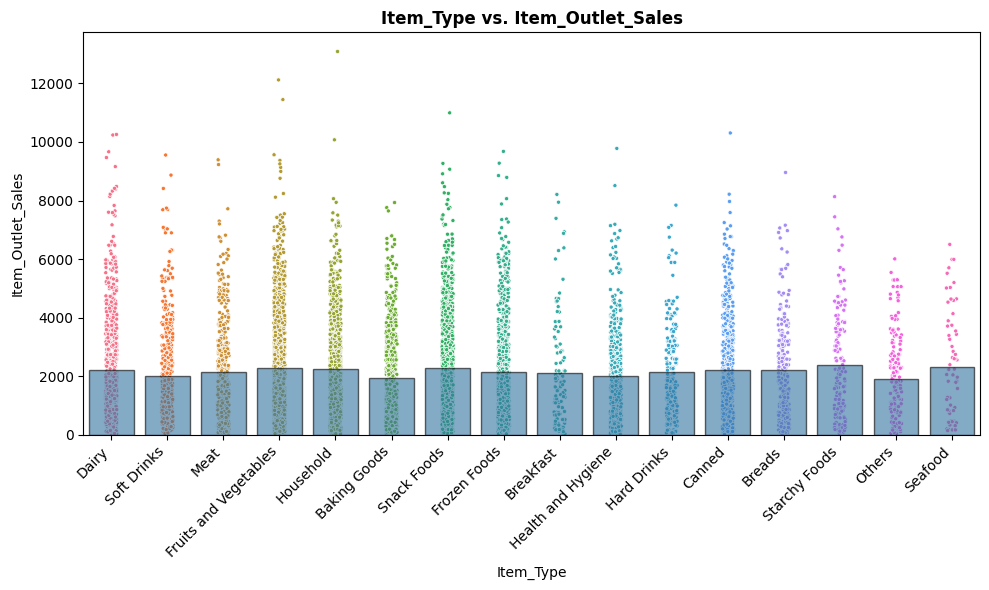

In [31]:
plot_categorical_vs_target(df, x =feature, y='Item_Outlet_Sales', figsize=(10, 6))

4) Feature vs. Target Observations

Based on your business understanding, would you expect this feature to be a predictor of the target?

`Yes, the items in the supermarket affect sales according to the customers’ desires. There are items that are in high demand, such as vegetables and fruits.`

Does this feature appear to be a predictor of the target?

`Yes it does`

#Inspecting: Item_MRP

###Item_MRP : Maximum Retail Price (list price) of the product

In [32]:
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

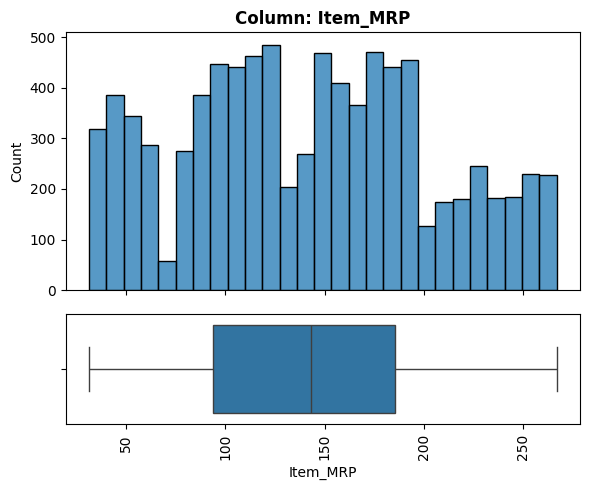

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [33]:
explore_numeric(df, feature);

2) Feature Observations What type of feature is it? (Categorical (nominal), ordinal, numeric)

`numeric.`

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

`0 null values.`

`No need to impute.`

Is the feature constant or quasi-constant?

`Not constant or quasi-constant.`

What is the cardinality? Is it high?

`Not applicable, numeric.`

Would we know this BEFORE the target is determined?

`Yes.`

Is there a business case/understanding reason to exclude based on our business case?

`No`

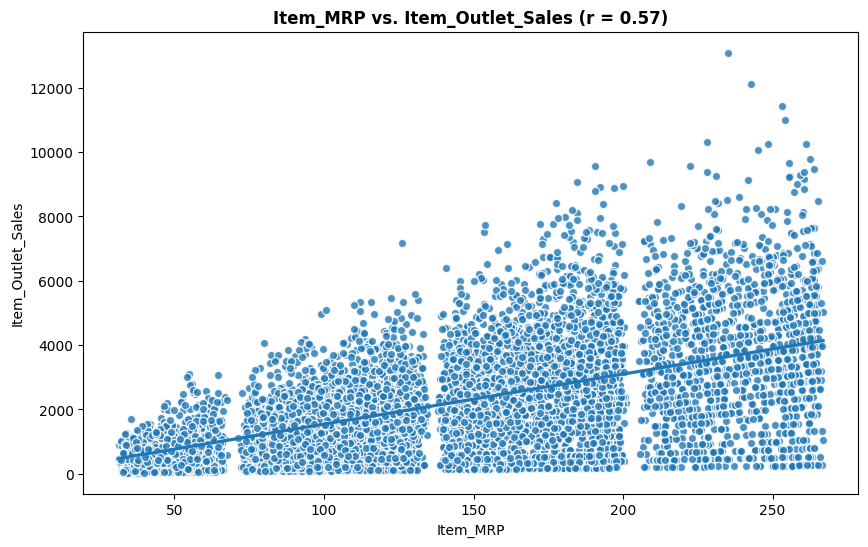

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [34]:
plot_numeric_vs_target(df, x =feature, y='Item_Outlet_Sales', figsize=(10, 6))

4) Feature vs. Target Observations

Based on your business understanding, would you expect this feature to be a predictor of the target?

`Yes, we notice that an increase in the retail price leads to an increase in sales, specific to the level between 100-200`

Does this feature appear to be a predictor of the target?

`Yes, because it indicates a direct relationship between retail price and sales.`

#Inspecting: Outlet_Identifier

###Outlet_Identifier : Store ID

In [35]:
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

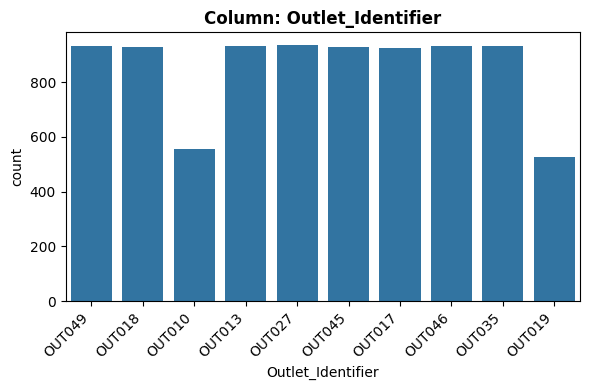

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [36]:
explore_categorical(df, feature,);

2) Feature Observations What type of feature is it? (Categorical (nominal), ordinal, numeric)

`Categorical.`

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

`0 null values.`

`No need to impute.`

Is the feature constant or quasi-constant?

`Not constant or quasi-constant.`

What is the cardinality? Is it high?

`10 , Yes it's high`

Would we know this BEFORE the target is determined?

`Yes.`

Is there a business case/understanding reason to exclude based on our business case?

`No`

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Identifier vs. Item_Outlet_Sales'}, xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>)

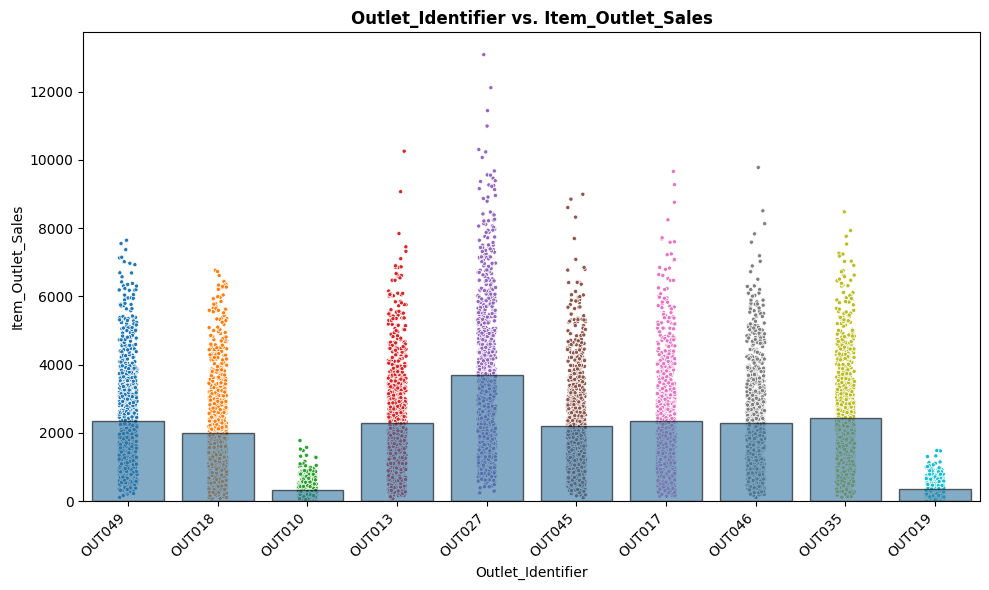

In [37]:
plot_categorical_vs_target(df, x =feature, y='Item_Outlet_Sales', figsize=(10, 6))

4) Feature vs. Target Observations

Based on your business understanding, would you expect this feature to be a predictor of the target?

`Yes, it appears that there are specific Identifier that accounted for the largest percentage of sales.`

Does this feature appear to be a predictor of the target?

`Yes it does , Show us the IDs that didn't sell and show us the best selling ones.`

#Inspecting: Outlet_Establishment_Year

###Outlet_Establishment_Year : The year in which store was established

In [38]:
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

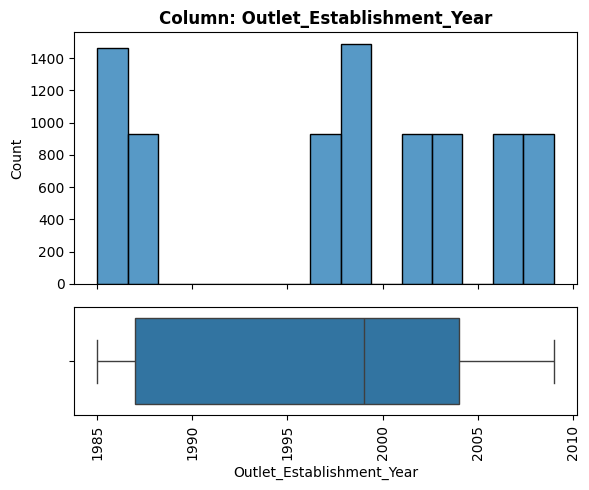

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [39]:
explore_numeric(df, feature);

2) Feature Observations What type of feature is it? (Categorical (nominal), ordinal, numeric)

`numeric.`

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

`0 null values.`

`No need to impute.`

Is the feature constant or quasi-constant?

`Not constant or quasi-constant.`

What is the cardinality? Is it high?

`Not applicable, numeric.`

Would we know this BEFORE the target is determined?

`Yes.`

Is there a business case/understanding reason to exclude based on our business case?

`No`

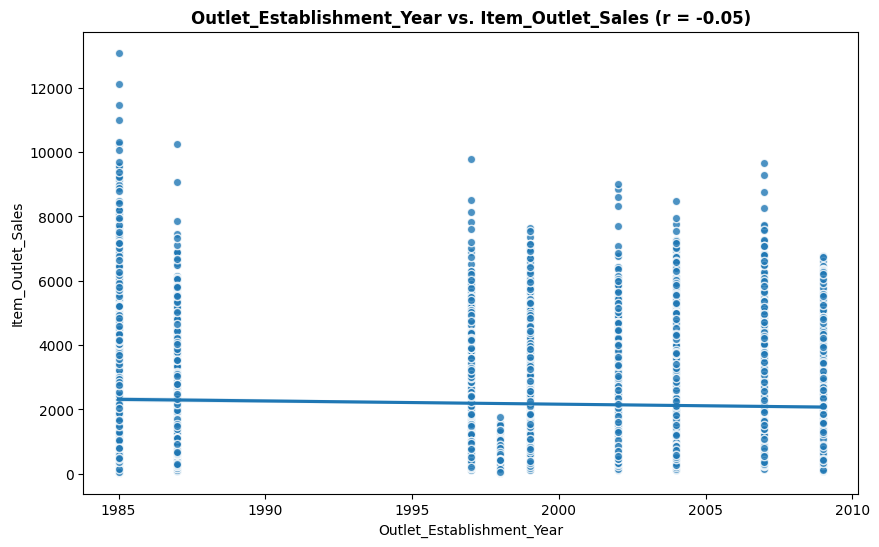

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Establishment_Year vs. Item_Outlet_Sales (r = -0.05)'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>)

In [40]:
plot_numeric_vs_target(df, x =feature, y='Item_Outlet_Sales', figsize=(10, 6))

4) Feature vs. Target Observations

Based on your business understanding, would you expect this feature to be a predictor of the target?

`No. I don't think the year the outlet was established will have much of an impact on sales. This is evident in the slight changes in sales and the simple relationship between them.`

Does this feature appear to be a predictor of the target?

`No`


#Inspecting: Outlet_Size

###Outlet_Size : The size of the store in terms of ground area covered

In [41]:
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

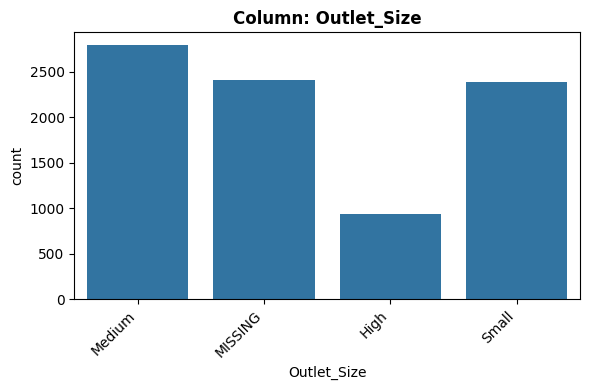

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [42]:
explore_categorical(df, feature);

2) Feature Observations What type of feature is it? (Categorical (nominal), ordinal, numeric)

`Categorical.`

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

`2410 (28.28%) null values.`

`impute with Medium`

Is the feature constant or quasi-constant?

`Not constant or quasi-constant.`

What is the cardinality? Is it high?

`low (4)`

Would we know this BEFORE the target is determined?

`Yes.`

Is there a business case/understanding reason to exclude based on our business case?

`No`

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

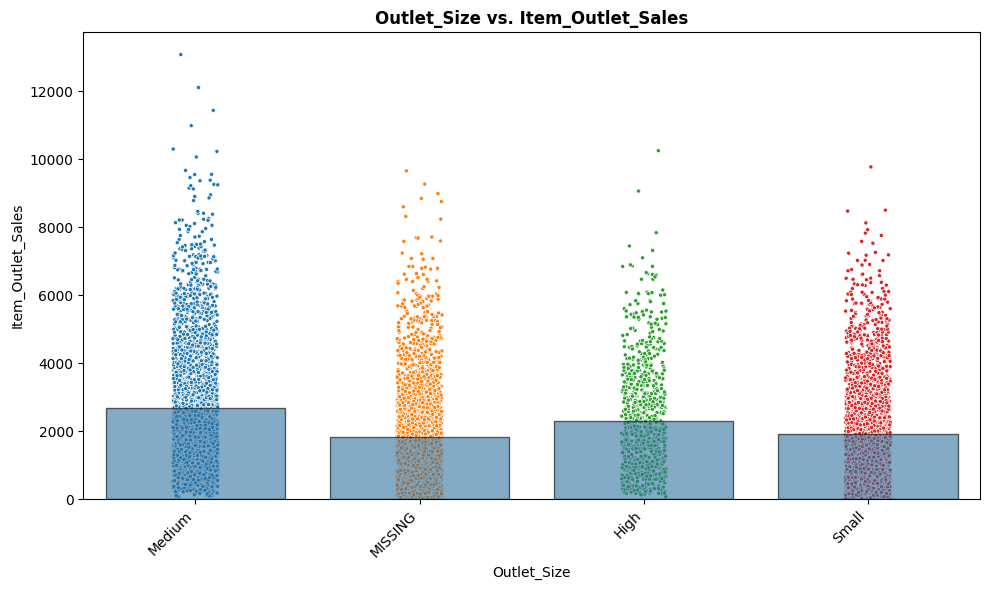

In [43]:
plot_categorical_vs_target(df, x =feature, y='Item_Outlet_Sales', figsize=(10, 6))

4) Feature vs. Target Observations

Based on your business understanding, would you expect this feature to be a predictor of the target?

`Yes, I think that the size of the outlet affects the customers’ desire to go there and thus affects sales.`

Does this feature appear to be a predictor of the target?

`Yes , Customers tend to favor medium-sized retailers more than high ones.`



#Inspecting: Outlet_Location_Type

###Outlet_Location_Type : The type of area in which the store is located

In [44]:
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

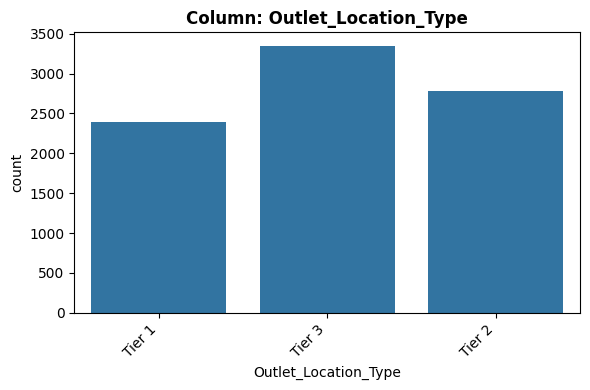

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [45]:
explore_categorical(df, feature);

2) Feature Observations What type of feature is it? (Categorical (nominal), ordinal, numeric)

`Categorical.`

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

`0 null values.`

`No need to impute.`

Is the feature constant or quasi-constant?

`Not constant or quasi-constant.`

What is the cardinality? Is it high?

`low (3)`

Would we know this BEFORE the target is determined?

`Yes.`

Is there a business case/understanding reason to exclude based on our business case?

`NO`

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

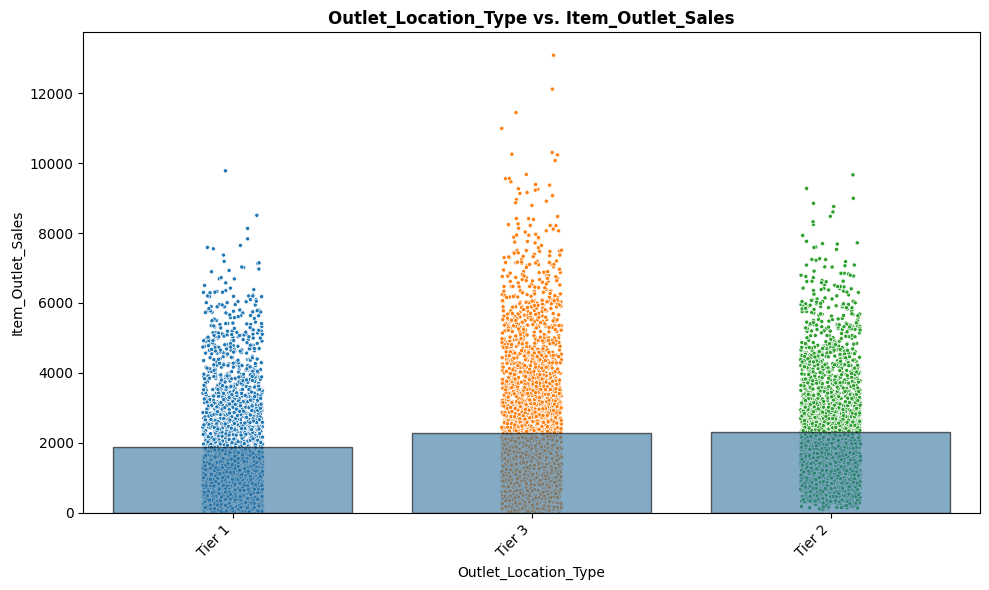

In [46]:
plot_categorical_vs_target(df, x =feature, y='Item_Outlet_Sales', figsize=(10, 6))

4) Feature vs. Target Observations

Based on your business understanding, would you expect this feature to be a predictor of the target?

`Yes, the location greatly affects sales and many factors such as security and ease of access.`

Does this feature appear to be a predictor of the target?

`Yes it does`

#Inspecting: Outlet_Type

###Outlet_Type : Whether the outlet is a grocery store or some sort of supermarket

In [47]:
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

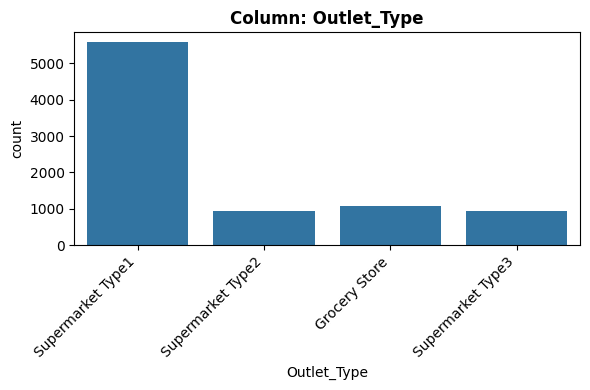

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [48]:
explore_categorical(df, feature);

2) Feature Observations What type of feature is it? (Categorical (nominal), ordinal, numeric)

`Categorical.`

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

`0 null values.`

`No need to impute.`

Is the feature constant or quasi-constant?

`Not constant or quasi-constant.`

What is the cardinality? Is it high?

`low (4)`

Would we know this BEFORE the target is determined?

`Yes.`

Is there a business case/understanding reason to exclude based on our business case?

`No`

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

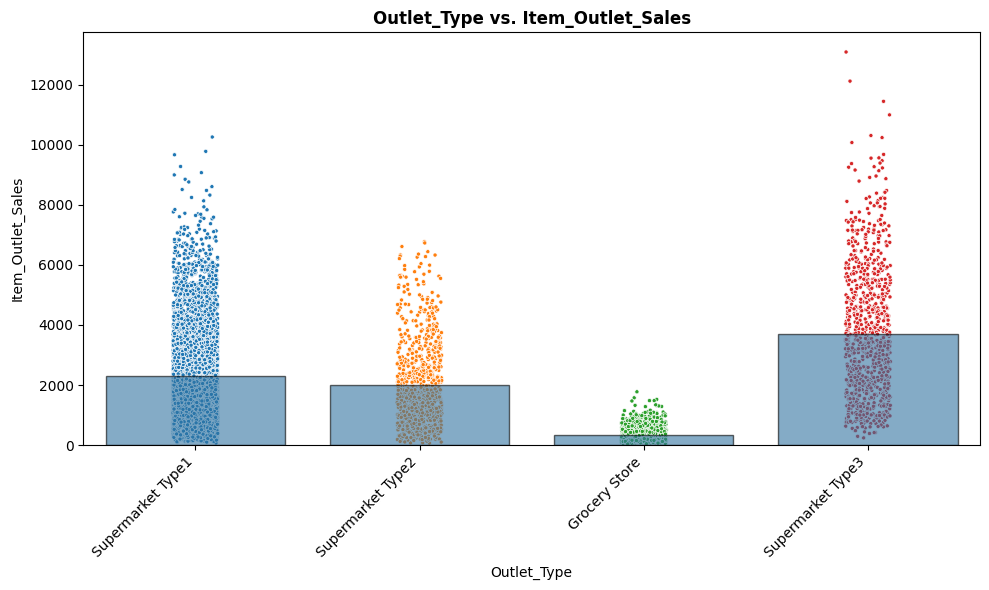

In [49]:
plot_categorical_vs_target(df, x =feature, y='Item_Outlet_Sales', figsize=(10, 6))

4) Feature vs. Target Observations

Based on your business understanding, would you expect this feature to be a predictor of the target?

`Yes, the type of outlet affects sales.`
`There are essential items that are consumed and sold in high ``volume, which allows you to effectively predict sales volume.`

Does this feature appear to be a predictor of the target?

`Yes it does ,There is a big difference between outlet's sales based on what items they offer that serve the needs of the community. `